In [2]:
from multiprocessing.pool import Pool

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
from skimage.transform import resize

import sys
additional_path = "../"
if additional_path not in sys.path:
    sys.path.insert(0, additional_path)
from libs.image_utils import get_random_patch_list, random_hide

%matplotlib inline

In [3]:
img = data.coins()[50:-50, 50:-50]
img = resize(img, (224,224))

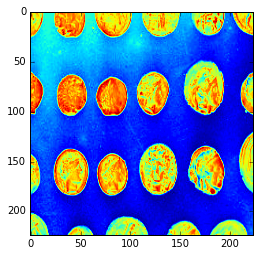

In [4]:
plt.imshow(img)

In [5]:
patch_list = get_random_patch_list(224, 56)

In [6]:
patch_list

[(0, 0, 56, 56),
 (56, 0, 56, 56),
 (112, 0, 56, 56),
 (168, 0, 56, 56),
 (0, 56, 56, 56),
 (56, 56, 56, 56),
 (112, 56, 56, 56),
 (168, 56, 56, 56),
 (0, 112, 56, 56),
 (56, 112, 56, 56),
 (112, 112, 56, 56),
 (168, 112, 56, 56),
 (0, 168, 56, 56),
 (56, 168, 56, 56),
 (112, 168, 56, 56),
 (168, 168, 56, 56)]

In [7]:
hide = random_hide(img, patch_list, hide_prob=0.5, mean=0.5)

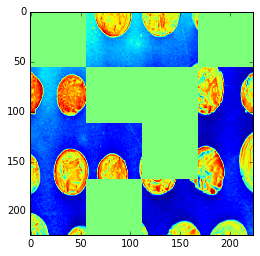

In [8]:
plt.imshow(hide)

In [9]:
img_array = np.stack([img]*10)

In [10]:
img_array.shape

(10, 224, 224)

In [11]:
pool = Pool()

In [12]:
result = pool.starmap(random_hide, zip(img_array.tolist(), [patch_list]*len(img_array)))

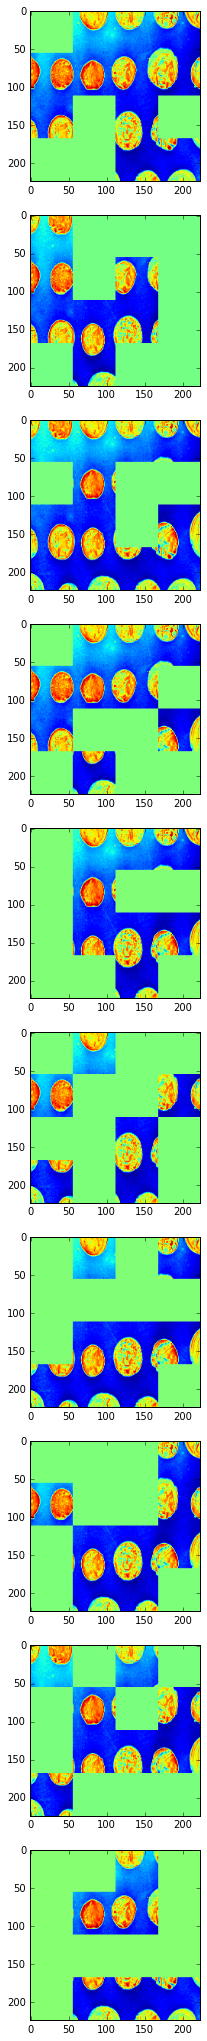

In [13]:
fig, axs = plt.subplots(len(result),1, figsize=(6,36))

for i, r in enumerate(result):
    axs[i].imshow(r)
